Introduction

For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.
Step One - Choose Your Data Set

Choose one of the following datasets to analyze for your project:

    Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained.

    Baseball Data - A data set containing complete batting and pitching statistics from 1871 to 2014, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. This dataset contains many files, but you can choose to analyze only the one(s) you are most interested in.

    Choose the comma-delimited version, which contains CSV files.

Step Two - Get Organized

Eventually you’ll want to submit your project (and share it with friends, family, and employers). Get organized before you begin. We recommend creating a single folder that will eventually contain:

    The report communicating your findings
    Any Python code you wrote as part of your analysis
    The data set you used (which you will not need to submit)

You may wish to use IPython notebook, in which case you can submit both the code you wrote and the report of your findings in the same document. Otherwise, you will need to submit your report and code separately.
Step Three - Analyze Your Data

Brainstorm some questions you could answer using the data set you chose, then start answering those questions. Here are some ideas to get you started:

    Titanic Data
        What factors made people more likely to survive?
    Baseball Data
        What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
        What are the characteristics of baseball players with the highest salaries?

Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!
Step Four - Share Your Findings

Once you have finished analyzing the data, create a report that shares the findings you found most interesting. You might wish to use IPython notebook to share your findings alongside the code you used to perform the analysis, but you can also use another tool if you wish.
Step Five - Review

Use the Project Rubric to review your project. If you are happy with your submission, then you're ready to submit your project. If you see room for improvement, keep working to improve your project.

I will be using the Batting.csv and the BattingPost.csv fle from the Baseball Data.

* What was the batting average of each player during the regular playing season?
* Over time, has batter's averages gone up, down, or stayed the same during the regular playing season?
* Is there a correlation between the number of singles (H), doubles (2B), triples (3B), or home runs (HR) to batting averages?
* Do players who make it to the post season perform the same, better, worse in the post season?

In [2]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Let's begin by reading in the files

batting_df = pd.read_csv("Batting.csv")
batting_post_df = pd.read_csv("BattingPost.csv")

# Doing a little display to make sure reading the file worked
print "Batting DataFrame"
batting_df.head()

Batting DataFrame


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


I am going to take a look at "AB", "H","2B","3B","HR".... those will be at the center of the questions I am posing so I will take a look.

In [16]:
batting_df['AB'].sum()

14424596.0

Populating the interactive namespace from numpy and matplotlib


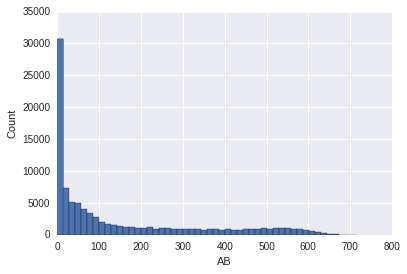

In [17]:
%pylab inline
batting_df['AB'].hist(bins=50)
plt.ylabel("Count")
plt.xlabel("AB")

96183


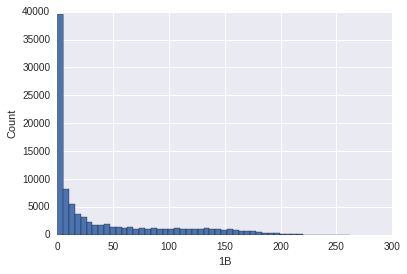

In [15]:
batting_df['H'].hist(bins=50)
plt.ylabel("Count")
plt.xlabel("1B")

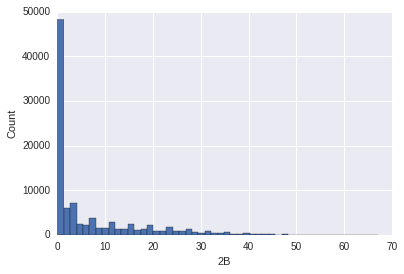

In [18]:
batting_df['2B'].hist(bins=50)
plt.ylabel("Count")
plt.xlabel("2B")

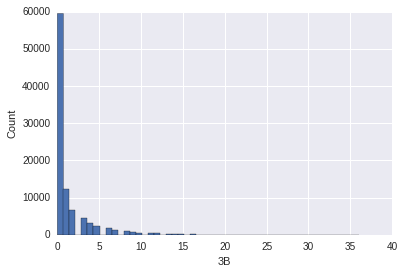

In [19]:
batting_df['3B'].hist(bins=50)
plt.ylabel("Count")
plt.xlabel("3B")

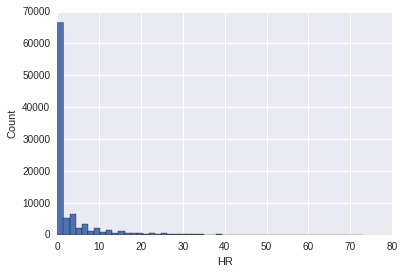

In [20]:
batting_df['HR'].hist(bins=50)
plt.ylabel("Count")
plt.xlabel("HR")

Interesting to see that a majority of the distribution of most values (AB, H, 2B, 3B, HR) is at near 0...

In [21]:
#More display - this time on Batting Post Season
print "Batting Post Season DataFrame"
batting_post_df.head()

Batting Post Season DataFrame


,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1884,WS,becanbu01,NY4,AA,1,2,0,1,0,...,0,0,NaN,0,0,0.0,NaN,NaN,NaN,NaN
1,1884,WS,bradyst01,NY4,AA,3,10,1,0,0,...,0,0,NaN,0,1,0.0,NaN,NaN,NaN,NaN
2,1884,WS,esterdu01,NY4,AA,3,10,0,3,1,...,0,1,NaN,0,3,0.0,NaN,NaN,NaN,NaN
3,1884,WS,forstto01,NY4,AA,1,3,0,0,0,...,0,0,NaN,0,1,0.0,NaN,NaN,NaN,NaN
4,1884,WS,keefeti01,NY4,AA,2,5,0,1,0,...,0,0,NaN,0,4,0.0,NaN,NaN,NaN,NaN


In [22]:
'''
Defining the batting average function.  This will add the total hits and the batting average into the DataFrame...
though from my old playing days of baseball I generally knew this to be the case, I did confirm via the following source:
Wikipedia Batting Average: https://en.wikipedia.org/wiki/Batting_average
'''
def batting_average(batting_dataframe):
    batting_dataframe['TOTAL_HITS'] = batting_dataframe['H'] + batting_dataframe['2B'] + \
    batting_dataframe['3B'] + batting_dataframe['HR']
    batting_dataframe['BATTING_AVERAGE'] = batting_dataframe['TOTAL_HITS'] / batting_dataframe['AB']
    return batting_dataframe



In [23]:
#Calling the batting average function on both the season batting and the post season.

season_batting_df = batting_average(batting_df)
post_season_batting_df = batting_average(batting_post_df)

#Showing the first few records of season DF to ensure data is being returned appropriately.
season_batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TOTAL_HITS,BATTING_AVERAGE
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.000000
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,38.0,0.322034
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,49.0,0.357664
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,58.0,0.436090
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,53.0,0.441667


In [24]:
#Showing the first few records of post season DF to ensure data is being returned appropriately.
post_season_batting_df.head()

,yearID,round,playerID,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TOTAL_HITS,BATTING_AVERAGE
0,1884,WS,becanbu01,NY4,AA,1,2,0,1,0,...,NaN,0,0,0.0,NaN,NaN,NaN,NaN,1,0.5
1,1884,WS,bradyst01,NY4,AA,3,10,1,0,0,...,NaN,0,1,0.0,NaN,NaN,NaN,NaN,0,0.0
2,1884,WS,esterdu01,NY4,AA,3,10,0,3,1,...,NaN,0,3,0.0,NaN,NaN,NaN,NaN,4,0.4
3,1884,WS,forstto01,NY4,AA,1,3,0,0,0,...,NaN,0,1,0.0,NaN,NaN,NaN,NaN,0,0.0
4,1884,WS,keefeti01,NY4,AA,2,5,0,1,0,...,NaN,0,4,0.0,NaN,NaN,NaN,NaN,1,0.2


In [29]:
'''
I have noticed that some values are null (aka NaN).  I would like to not have these records
as they just add noise to the data
'''
season_batting_df.loc[season_batting_df['AB'].isnull()]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TOTAL_HITS,BATTING_AVERAGE
50858,abbotgl01,1973,1,OAK,AL,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50864,alburvi01,1973,1,MIN,AL,14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50865,alexado01,1973,1,BAL,AL,29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50871,allenll01,1973,1,CAL,AL,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50872,allenll01,1973,2,TEX,AL,23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50902,baldwda01,1973,1,CHA,AL,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50904,baneed01,1973,1,MIN,AL,23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50906,barbest01,1973,1,CAL,AL,50,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50914,beenefr01,1973,1,NYA,AL,19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50917,bellje01,1973,1,ML4,AL,31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There were 5149 records in my batting information and I am deciding to remove them.  They just add noise to the data and won't do anything for what I am evaluating.

In [30]:
# Adjusting my dataframes to remove players who had a null at bat

season_batting_df = season_batting_df.loc[season_batting_df['AB'].notnull()]
post_season_batting_df = post_season_batting_df.loc[post_season_batting_df['AB'].notnull()]



Populating the interactive namespace from numpy and matplotlib


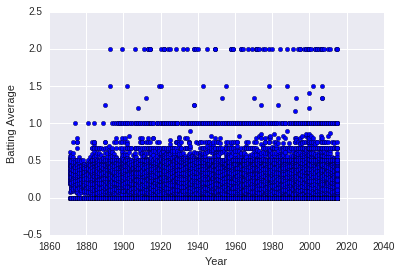

In [31]:
#Now, to answer my first few questions I will plot some information on batting average
%pylab inline
plt.scatter(season_batting_df['yearID'],season_batting_df['BATTING_AVERAGE'])
plt.ylabel('Batting Average')
plt.xlabel('Year')

In [32]:
# It appears there are some outliers that don't make sense - a batting average cannot be above 1... investigating...

season_batting_df.loc[season_batting_df['BATTING_AVERAGE'] > 1]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,CS,BB,SO,IBB,HBP,SH,SF,GIDP,TOTAL_HITS,BATTING_AVERAGE
4782,lynchja01,1890,1,BR4,AA,1,4.0,2.0,3.0,2.0,...,NaN,1.0,NaN,NaN,0.0,NaN,NaN,NaN,5.0,1.250000
5880,gumbebi01,1893,1,LS3,NL,1,1.0,0.0,1.0,1.0,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2.0,2.000000
5964,oconnfr01,1893,1,PHI,NL,3,2.0,1.0,2.0,0.0,...,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,3.0,1.500000
7675,gastowe01,1899,1,BRO,NL,1,1.0,0.0,1.0,1.0,...,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,2.0,2.000000
8697,hopkimi01,1902,1,PIT,NL,1,2.0,0.0,2.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,3.0,1.500000
10393,knollhu01,1906,1,BRO,NL,2,1.0,0.0,1.0,1.0,...,NaN,0.0,NaN,NaN,0.0,1.0,NaN,NaN,2.0,2.000000
11215,gehrihe01,1908,1,WS1,AL,5,5.0,2.0,3.0,3.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,6.0,1.200000
13027,phillde01,1911,1,PIT,NL,3,1.0,0.0,1.0,1.0,...,NaN,1.0,0.0,NaN,0.0,0.0,NaN,NaN,2.0,2.000000
13450,irvined01,1912,1,DET,AL,1,3.0,0.0,2.0,0.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,4.0,1.333333
13830,baskeji01,1913,1,CLE,AL,2,1.0,1.0,1.0,1.0,...,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,2.0,2.000000


In [33]:
season_batting_averages_by_year_df = season_batting_df[['yearID', 'BATTING_AVERAGE']].groupby('yearID', as_index=False).mean()
season_batting_averages_by_year_df

,yearID,BATTING_AVERAGE
0,1871,0.310048
1,1872,0.284096
2,1873,0.283575
3,1874,0.273802
4,1875,0.254323
5,1876,0.242788
6,1877,0.271405
7,1878,0.276552
8,1879,0.264852
9,1880,0.254038


Now that I know it is 98 records, do I really care?  I'm going to check what impact it has to the overall set of data.  I will print off the mean of all batting averages, then the mean of the batting averages at or below 1.

In [34]:
#Print off batting averages
print "Batting Average of all batter entries" 
print season_batting_df['BATTING_AVERAGE'].mean()

#Print off batting average after "removing" the rows where a batter had a batting average greater than 1.
print "Batting Average after removing the rows where a batter had a batting average greater than 1" 
print season_batting_df.loc[season_batting_df['BATTING_AVERAGE'] <= 1]['BATTING_AVERAGE'].mean()

print "Batting Average difference between batters with a valid batting average and batters without a valid batting average"
print season_batting_df['BATTING_AVERAGE'].mean() - season_batting_df.loc[season_batting_df['BATTING_AVERAGE'] <= 1]['BATTING_AVERAGE'].mean()

#Printing off standard deviation for all "normal" batters
print season_batting_df.loc[season_batting_df['BATTING_AVERAGE'] <= 1]['BATTING_AVERAGE'].std(ddof=0)


Batting Average of all batter entries
0.260304319586
Batting Average after removing the rows where a batter had a batting average greater than 1
0.258511905514
Batting Average difference between batters with a valid batting average and batters without a valid batting average
0.00179241407159
0.148956951644


While the batting average changes by ~.002, the standard deviation for the "normal" set is .148, and .002 falls well within.  I am going to say the 98 records do not have a signficant impact..... carrying on.

The data above regarding outliers is interesting - the data plotted is also very difficult to read.  I am curious to see what the batting average is generally year over year, so I am going to review below.

Populating the interactive namespace from numpy and matplotlib
This is the average Batting Average year over year


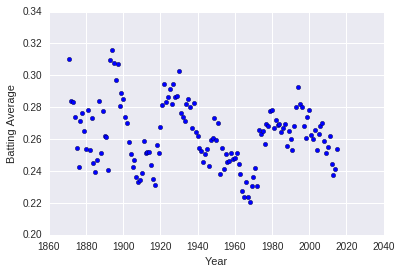

In [46]:
#Now, to answer my first few questions I will plot some information on batting average
%pylab inline
plt.scatter(season_batting_averages_by_year_df['yearID']
            ,season_batting_averages_by_year_df['BATTING_AVERAGE'])
ylabel('Batting Average')
xlabel('Year')

print "This is the average Batting Average year over year"

What is the trend of batting average for each player

In [37]:
season_batting_average_df = season_batting_df[['playerID','yearID','BATTING_AVERAGE']]

Picking a couple random playerID out of the list to do a check on.  
I could plot all of the players, but that was getting very challenging to interpret in a single graph.
I found with the players I picked it does have an impact... though this is not a valid statistical model, to demonstrate plotting I will call it good :)



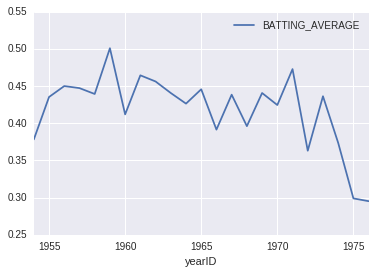

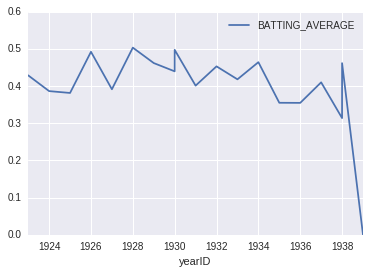

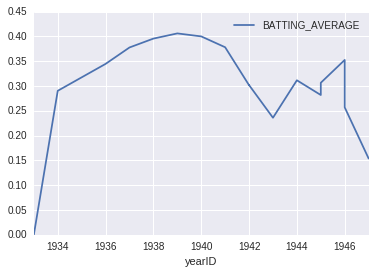

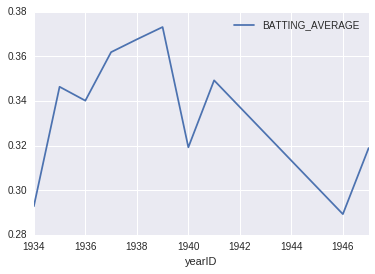

In [38]:
#Graphing some random samples
season_batting_average_df.loc[season_batting_average_df['playerID'] == 'aaronha01'].plot('yearID','BATTING_AVERAGE')

season_batting_average_df.loc[season_batting_average_df['playerID'] == 'manushe01'].plot('yearID','BATTING_AVERAGE')

season_batting_average_df.loc[season_batting_average_df['playerID'] == 'hayesfr01'].plot('yearID','BATTING_AVERAGE')

season_batting_average_df.loc[season_batting_average_df['playerID'] == 'lavagco01'].plot('yearID','BATTING_AVERAGE')


Is there a correlation between
    * H to Batting Average
    * 2B to Batting Average
    * 3B to Batting Average
    * HR to Batting Average

In [39]:
#Defining a correlation function using same one from the lessons

def correlation(x, y):
    standard_x = ((x-x.mean())) / x.std(ddof=0)
    standard_y = ((y-y.mean())) / y.std(ddof=0)
    
    return (standard_x * standard_y).mean()

#Gathering required fields to do the correlation review
hits = season_batting_df['H']
doubles = season_batting_df['2B']
triples = season_batting_df['3B']
home_runs = season_batting_df['HR']
batting_average = season_batting_df['BATTING_AVERAGE']


In [40]:
# Run correlation function for H to Batting Average
correlation(hits, batting_average)

0.45115600827229935

In [41]:
# Run correlation function for 2B to Batting Average
correlation(doubles, batting_average)

0.4547350357714893

In [42]:
# Run correlation function for 3B to Batting Average
correlation(triples, batting_average)

0.3357264206386593

In [43]:
# Run correlation function for HR to Batting Average
correlation(home_runs, batting_average)

0.35304917956480913

Now I am going to compare for players who have made it to the post season, if there batting average is better or worse in the post season.

In [44]:
'''Merging the two dataframes together - I am doing an inner merge as 
for this data as I want to evaluate players who made it to the post season
'''
combined_player_df = season_batting_average_df.merge(post_season_batting_df,how='inner', on=['playerID','yearID'])

combined_player_df['BATTING_AVERAGE_DIFF'] = combined_player_df['BATTING_AVERAGE_x'] - combined_player_df['BATTING_AVERAGE_y']

combined_player_df['BATTING_AVERAGE_DIFF'].mean()


0.050550728507725455

In [45]:
combined_player_df['BATTING_AVERAGE_DIFF'].std()

0.26491535507142844

The information above tells me two things:
    1. Players in the post season on average bat ~.051 worse in the post season than in the regular season
    2. Even though they bat worse, the standard deviation is only .26, so there is not a significant difference

# Report

Baseball Data

I used the baseball data (specifically Batting.csv and BattingPost.csv) and had the following questions:
    1. What was the batting average of each player during the regular playing season?
    2. Over time, has batter's averages gone up, down, or stayed the same during the regular playing season?
    3. Is there a correlation between the number of singles (H), doubles (2B), triples (3B), or home runs (HR) to batting averages?
    4. Is there a correlation between the number of singles (H), doubles (2B), triples (3B), or home runs (HR) to batting averages?
    5. Do players who make it to the post season perform the same, better, worse in the post season?
    
While all of the metrics were somewhat interesting, the one I was most curious about was "Do players who make it to the post season perform same, better, or worse in the post season?".  As players progress throughout the year and into the post season, it would seem to be that although there is some excitement/adrenaline in playing the post season, I had suspected that during the post season players would perform worse, but not significantly worse.

These results are tentative and to really determine the answer to that question, I would need to do more analysis (for example: Did the pitchers perform better or worse, weather conditions, stadium conditions, did they play home vs. away, etc) to get a more accurate picture.  The data had 5149 batter values that had no "At Bats", but had games played and appeared in the dataset.  From the data I can't tell if that was a statistical error, or they truly had no "At Bats", which, in that case, I wonder why they appear in a dataset called "Batting."  With the data being in the condition it is in, without further research and clarification, my investigation is really tentative and potentially prone to error.

Here is what I have determined, again, tentatively and not put through the rigor of detailed statistical analysis.  I found that players who make it to the post season on average bat .051 worse than they do during the regular season, though the standard deviation is not significant enough (.265) to really say that players perform signficantly worse in the post season.